In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
drug_path = "data/mouse_drug_data.csv"
clinical_path= "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(drug_path)
clinic_df = pd.read_csv(clinical_path)
# Combine the data into a single dataset

df = pd.merge(clinic_df, mouse_df, on="Mouse ID", how='left')
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
groupeddata = df.groupby(["Drug", "Timepoint"]).mean().reset_index()
groupeddata = groupeddata[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
# Convert to DataFrame
df_drugs = pd.DataFrame(groupeddata)
# Preview DataFrame
df_drugs

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stError = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
stError = stError[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
# Convert to DataFrame
stError_df = pd.DataFrame(stError)
stError_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
formatted_df = pd.pivot_table(df_drugs, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)
# Preview that Reformatting worked
formatted_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


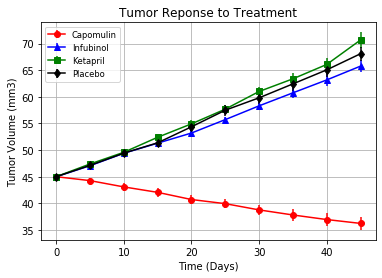

In [5]:
# Generate the Plot (with Error Bars)
drugs = df.Drug.unique()
Drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
markers = ["o", "^", "s", "d"]
colors = ["r", "b", "g", "k"]
x_axis = np.arange(0 , ((df["Timepoint"].max())+5), 5)
sem = pd.pivot_table(stError_df, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)
fig, ax = plt.subplots()

for i in range(0, len(Drugs)):
    ax.errorbar(x_axis, formatted_df[Drugs[i]], yerr=sem[Drugs[i]], fmt=markers[i], linestyle='-',
                color = colors[i], label=Drugs[i])
plt.title("Tumor Reponse to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure
fig.savefig('Tumor_reponse.png')

In [152]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
metastatic_df = pd.DataFrame(metastatic)
# Preview DataFrame
metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
StErr_Met = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
StErr_Met_df = pd.DataFrame(StErr_Met)
# Preview DataFrame
StErr_Met_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
formatted_df = pd.pivot_table(df_drugs, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)
# Preview that Reformatting worked
formatted_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


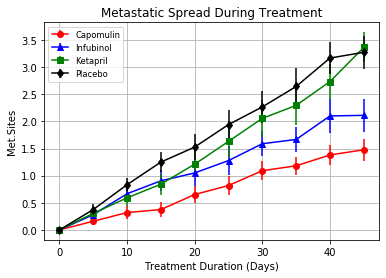

In [11]:
# Generate the Plot (with Error Bars)
means = pd.pivot_table(metastatic_df, values="Metastatic Sites", index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)
sem = pd.pivot_table(StErr_Met_df, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)

drugs = df.Drug.unique()
Drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
markers = ["o", "^", "s", "d"]
colors = ["r", "b", "g", "k"]
x_axis = np.arange(0 , ((df["Timepoint"].max())+5), 5)

fig, ax = plt.subplots()

for i in range(0, len(Drugs)):
    ax.errorbar(x_axis, means[Drugs[i]], yerr=sem[Drugs[i]], fmt=markers[i], linestyle='-',
                color=colors[i], label=Drugs[i])
plt.title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met.Sites")
plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
fig.savefig('Metastatic_spread.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice = df.groupby(["Drug", "Timepoint"])["Mouse ID"].count().reset_index()
Mice.rename(columns = {"Mouse ID":"Mouse Count"}, inplace = True) 
# Convert to DataFrame
Mice_df = pd.DataFrame(Mice)
# Preview DataFrame
Mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
format_Mice_df = pd.pivot_table(Mice_df, values="Mouse Count", index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)
# Preview the Data Frame
format_Mice_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


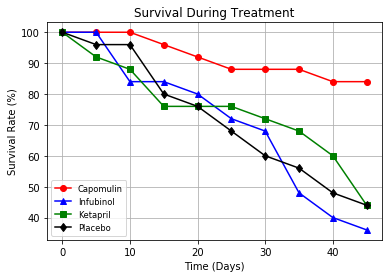

In [14]:
# Generate the Plot (Accounting for percentages)

Drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
markers = ["o", "^", "s", "d"]
colors = ["r", "b", "g", "k"]
x_axis = np.arange(0 , ((df["Timepoint"].max())+5), 5)
fig, ax = plt.subplots()

for i in range(0, len(Drugs)):
    ax.plot(x_axis, (format_Mice_df[Drugs[i]]/format_Mice_df[Drugs[i]].max())*100, 
                markers[i], linestyle='-',color=colors[i], label=Drugs[i])
    
plt.title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
fig.savefig('survival_plot.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
drugs = sorted(df.Drug.unique())
Percent_change = {}
for d in drugs:
    percent = (formatted_df[d]/formatted_df[d][0])*100
    #precent_df = pd.DataFrame(percent)
    Percent_change[d] = round((percent.iloc[-1] - percent.iloc[0]), 6)
# Display the data to confirm
precent_df = pd.DataFrame(list(Percent_change.items()), columns=['Drug', 'Percent Change'])
precent_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

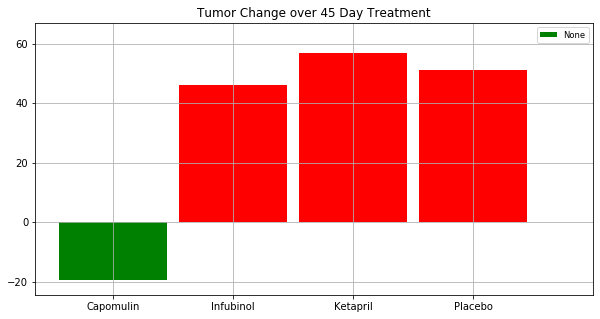

In [88]:
# Store all Relevant Percent Changes into a Tuple
tuples = [(k,v) for k,v in Percent_change.items()]

# Splice the data between passing and failing drugs
tickers = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
x = []

for v in tuples:
    if v[0] in tickers:
        x.append(v[1])
#print (percent_ch)
# Orient widths. Add labels, tick marks, etc.

x_axis = range(len(x))

plot_df1 = precent_df[precent_df['Drug'].isin(tickers)]
plot_df = plot_df1[["Percent Change"]]
dfstacked =plot_df.stack()
mask = dfstacked <= 3
colors = np.array(['r']*len(dfstacked))
colors[mask.values] = 'g'
dfstacked.plot(kind = 'bar', rot = 0, color = colors, width = 0.9, figsize=(10,5))
plt.xticks(x_axis, plot_df1["Drug"], rotation="horizontal")
   

plt.title("Tumor Change over 45 Day Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.xlim(-0.65, len(x_axis))
plt.ylim(min(x)-5, max(x)+10)
# Save the Figure
#fig.savefig('survival_plot.png')

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/change.png)